**Exploratory Data Analysis Of Haberman Data Set**

**Our Objective is do an exploratory analysis on Haberman dataset to find out how the independent variables are affecting the depend variable both individualy and collectively with help of various visualizations**

In [42]:
#importing python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

In [43]:
#reading the haberman dataset

df = pd.read_csv('haberman.csv')

In [44]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Initially looking at this data (downloaded from the Google classes) it was not clear what the columns year & status(1 & 2 ) meant, therefore looked it up on Kaggle (https://www.kaggle.com/gilsousa/habermans-survival-data-set) directly and found that the column year refers to the op_year i.e when the patient had an operation and in status 1 pointed to the patient who survived 5 years or longer and 2 pointed to the patient died within 5 year

In [46]:
#chaging the columns name to avoid the above confusion

df.columns = ['patient_age','op_year','axillary_nodes','status']
df.head()

,patient_age,op_year,axillary_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Now from the data above we can deduce that the columns age,year & nodes are independent variables and the column status a dependent variable i.e the former affect the latter

In [47]:
#shape of the dataset
df.shape

(306, 4)

In [48]:
#checking for possible nulls in the dataset
df.isnull().sum()

patient_age       0
op_year           0
axillary_nodes    0
status            0
dtype: int64

Reference for finding sum of nulls in each column :https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe

In [49]:
#checking if the data in the categorical column status is skewed 
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [50]:
df.describe()

,patient_age,op_year,axillary_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From the above it can be observed that the column status is skewed in favour of survivors i.e 1

**Since the number of variables are small, lets start off with pair plot to get a high level overiew of the data**

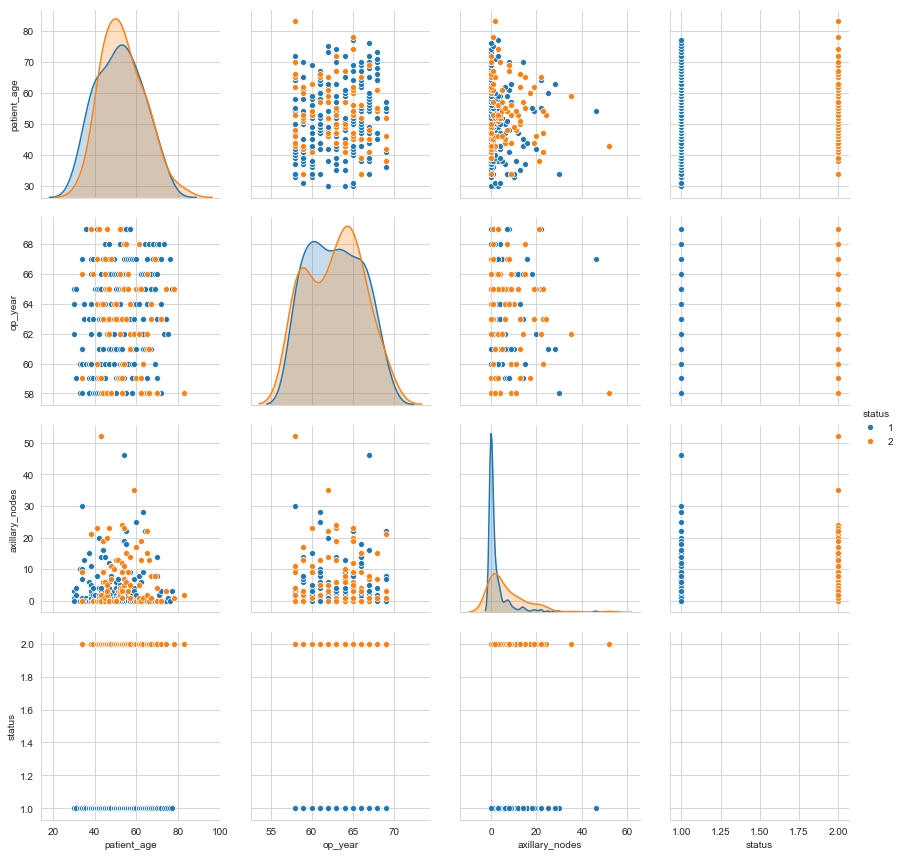

In [52]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status",size=3)
plt.show();

The pair plot above shows the staus plot as well, which is categorical in nature, therefore trasforming it below

In [53]:
df['status'] = df.status.map({1:'Yes',2:'No'})

In [55]:
df.head()

,patient_age,op_year,axillary_nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


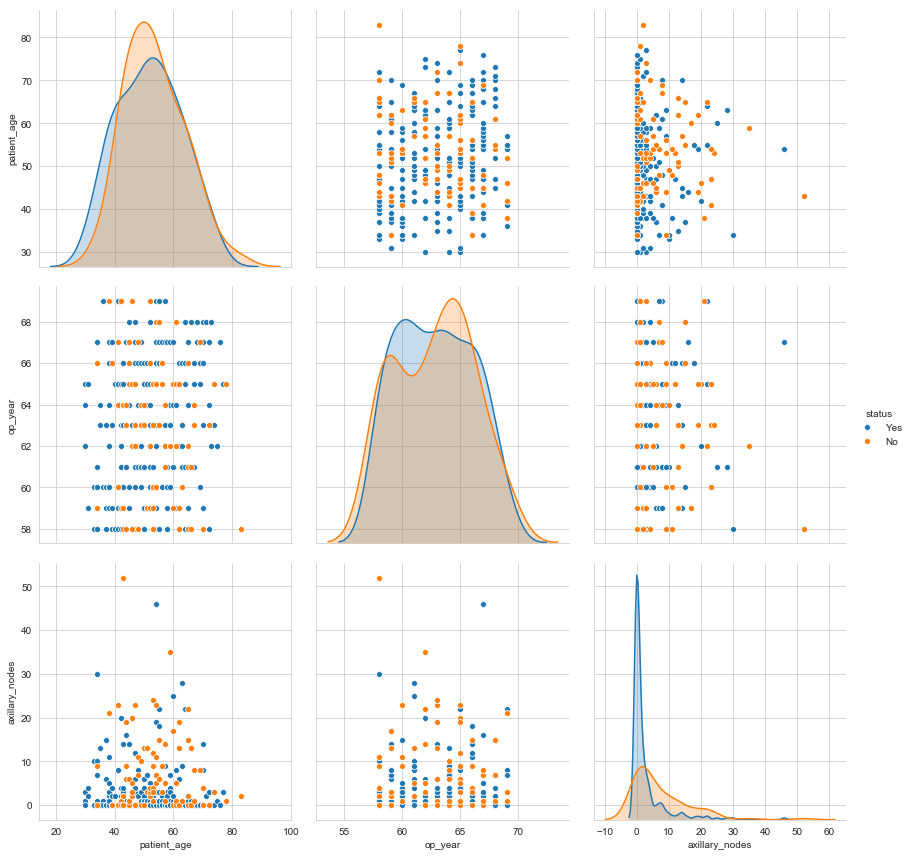

In [56]:
plt.close();
sns.pairplot(df,hue='status',height=4)
plt.show();

From the pair plot above, it can be observed that the data points pertaining to both survivers and non-survivers (irespective of combination of the plot) are mixed together, therefore it is not possible to classify with regular observation and requires further analysis using univariable

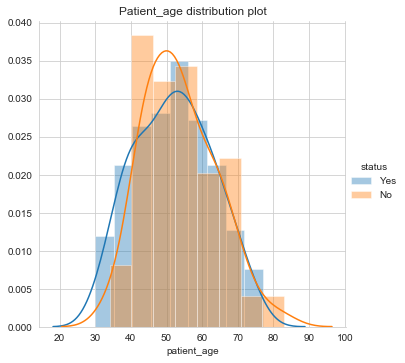

In [57]:
sns.FacetGrid(df,hue='status',size=5)\
.map(sns.distplot,'patient_age')\
.add_legend()
plt.title('Patient_age distribution plot');
plt.show();

The overalp is significant therefore age is not a good variable for classifying the data

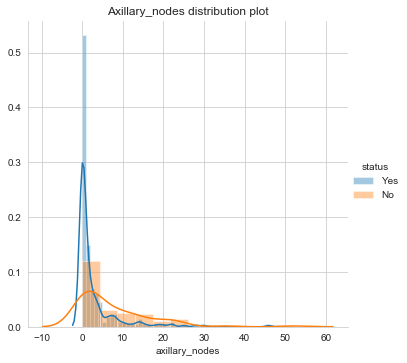

In [59]:
sns.FacetGrid(df,hue='status',size=5)\
.map(sns.distplot,'axillary_nodes')\
.add_legend();
plt.title('Axillary_nodes distribution plot')
plt.show();

The above histogram tells us that the probability of a patient with 0 axillary nodes surviving is high compare to patient having more than zero axillary nodes

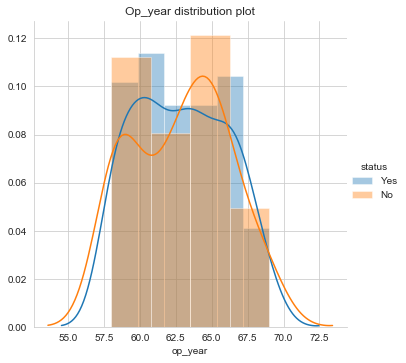

In [61]:
sns.FacetGrid(df,hue='status',size=5)\
.map(sns.distplot,'op_year')\
.add_legend();
plt.title('Op_year distribution plot');
plt.show();

Similar to patient_age, the variable op_year also does not provide any insight.

In [24]:
df_survivors = df.loc[df['status']=='Yes']

In [25]:
count, bin_edge = np.histogram(df_survivors['axillary_nodes'],bins=50,density=True)
print(count)
print(bin_edge)

[0.56521739 0.15942029 0.07246377 0.06280193 0.04830918 0.00966184
 0.01932367 0.02415459 0.02415459 0.00966184 0.00966184 0.00483092
 0.         0.00483092 0.00483092 0.01449275 0.00483092 0.00483092
 0.         0.00483092 0.00483092 0.00483092 0.         0.00966184
 0.         0.         0.         0.00483092 0.         0.
 0.00483092 0.         0.00483092 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00483092]
[ 0.    0.92  1.84  2.76  3.68  4.6   5.52  6.44  7.36  8.28  9.2  10.12
 11.04 11.96 12.88 13.8  14.72 15.64 16.56 17.48 18.4  19.32 20.24 21.16
 22.08 23.   23.92 24.84 25.76 26.68 27.6  28.52 29.44 30.36 31.28 32.2
 33.12 34.04 34.96 35.88 36.8  37.72 38.64 39.56 40.48 41.4  42.32 43.24
 44.16 45.08 46.  ]


In [26]:
pdf = count/sum(count)
print(pdf)


[0.52       0.14666667 0.06666667 0.05777778 0.04444444 0.00888889
 0.01777778 0.02222222 0.02222222 0.00888889 0.00888889 0.00444444
 0.         0.00444444 0.00444444 0.01333333 0.00444444 0.00444444
 0.         0.00444444 0.00444444 0.00444444 0.         0.00888889
 0.         0.         0.         0.00444444 0.         0.
 0.00444444 0.         0.00444444 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00444444]


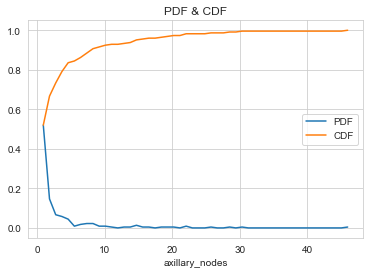

In [69]:
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('axillary_nodes')
plt.title('PDF & CDF')
plt.gca().legend(('PDF','CDF'));

Reference for adding legend to a plot such as above : https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-most-simple-manner-possible

The PDF and CDF also re-iterate the fact that the patient has a high chance of surviving if she has less 1 axillary node and the chances of survival drop significantly as the number of axillary nodes increase 

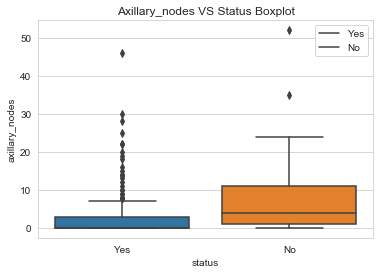

In [72]:
sns.boxplot(x='status',y='axillary_nodes',data=df)
plt.title('Axillary_nodes VS Status Boxplot')
plt.gca().legend(('Yes','No'))
plt.show();

From the boxplot above it is clear that as the axillary nodes increase post 5 (i.e mean of the no boxplot) the rate of deaths incrase drastically. 

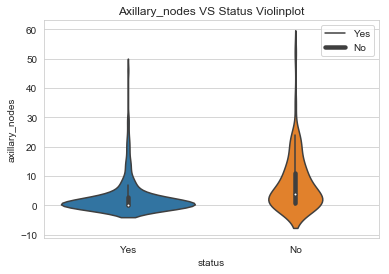

In [71]:
sns.violinplot(x='status', y='axillary_nodes', data = df)
plt.title('Axillary_nodes VS Status Violinplot')
plt.gca().legend(('Yes','No'))
plt.show()

The violin plot simply re-iterates the point made above by the boxplot, pdf & cdf. The patient has a high rate of survival if the number of axillary node is equal to 0 

# Conclusions

Out of all the independent variables axillary node has most impact in determining the status of a patience post operation

The patient has a high chance of surviving if she has less than 1 axillary node and the chances of survival drop significantly as the number of axillary nodes increase

The patients who had  nodes from 1 to 24 are the majority of patients who died.